In [17]:
import cv2
import numpy as np
import tensorflow as tf


In [30]:
def format_frames(frame, output_size):
    """
    Pad and resize an image from a video.

    Args:
      frame: Image that needs to resized and padded. 
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
    """
    try:
        frame = tf.image.convert_image_dtype(frame, tf.float32)
        frame = tf.image.resize_with_pad(frame, *output_size)
        return frame
        
    except tf.errors.InvalidArgumentError as e:
        # Handle the specific exception raised when the conversion fails
        print(f"Error converting image data type: {e}")
        # You may want to log the error, raise a custom exception, or take other actions
    except Exception as e:
        # Handle other exceptions that might occur
        print(f"An unexpected error occurred: {e}")
        # You can customize this block based on your specific needs

In [31]:
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 5):
    """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
    """
    # Read each video frame by frame
    result = []
    src = cv2.VideoCapture(str(video_path))  

    video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

    need_length = 1 + (n_frames - 1) * frame_step

    if need_length > video_length:
        start = 0
    else:
        max_start = video_length - need_length
        start = random.randint(0, max_start + 1)

    src.set(cv2.CAP_PROP_POS_FRAMES, start)
    # ret is a boolean indicating whether read was successful, frame is the image itself
    ret, frame = src.read()
    result.append(format_frames(frame, output_size))

    for _ in range(n_frames - 1):
        for _ in range(frame_step):
            ret, frame = src.read()
        if ret:
            frame = format_frames(frame, output_size)
            result.append(frame)
        else:
            result.append(np.zeros_like(result[0]))
    src.release()
    result = np.array(result)[..., [2, 1, 0]]

    return result

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_extracted_frames(num_rows, num_cols, frames_array):

    # Create a Matplotlib figure and subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))  # Adjust figsize as needed

    # Flatten the 2D array of subplots to make it easier to iterate through
    axes = axes.flatten()

    # Iterate through the image paths and display each image on a subplot
    for count, frame in enumerate(frames_array):
        if count < num_rows * num_cols:
            # Display the image on the current subplot
            axes[count].imshow(frame)
            axes[count].set_title(f'Image {count + 1}')
            # Turn off axis labels
            axes[count].axis('off')

    # Adjust the layout for better visualization
    plt.tight_layout()

    # Show the subplots
    plt.show()

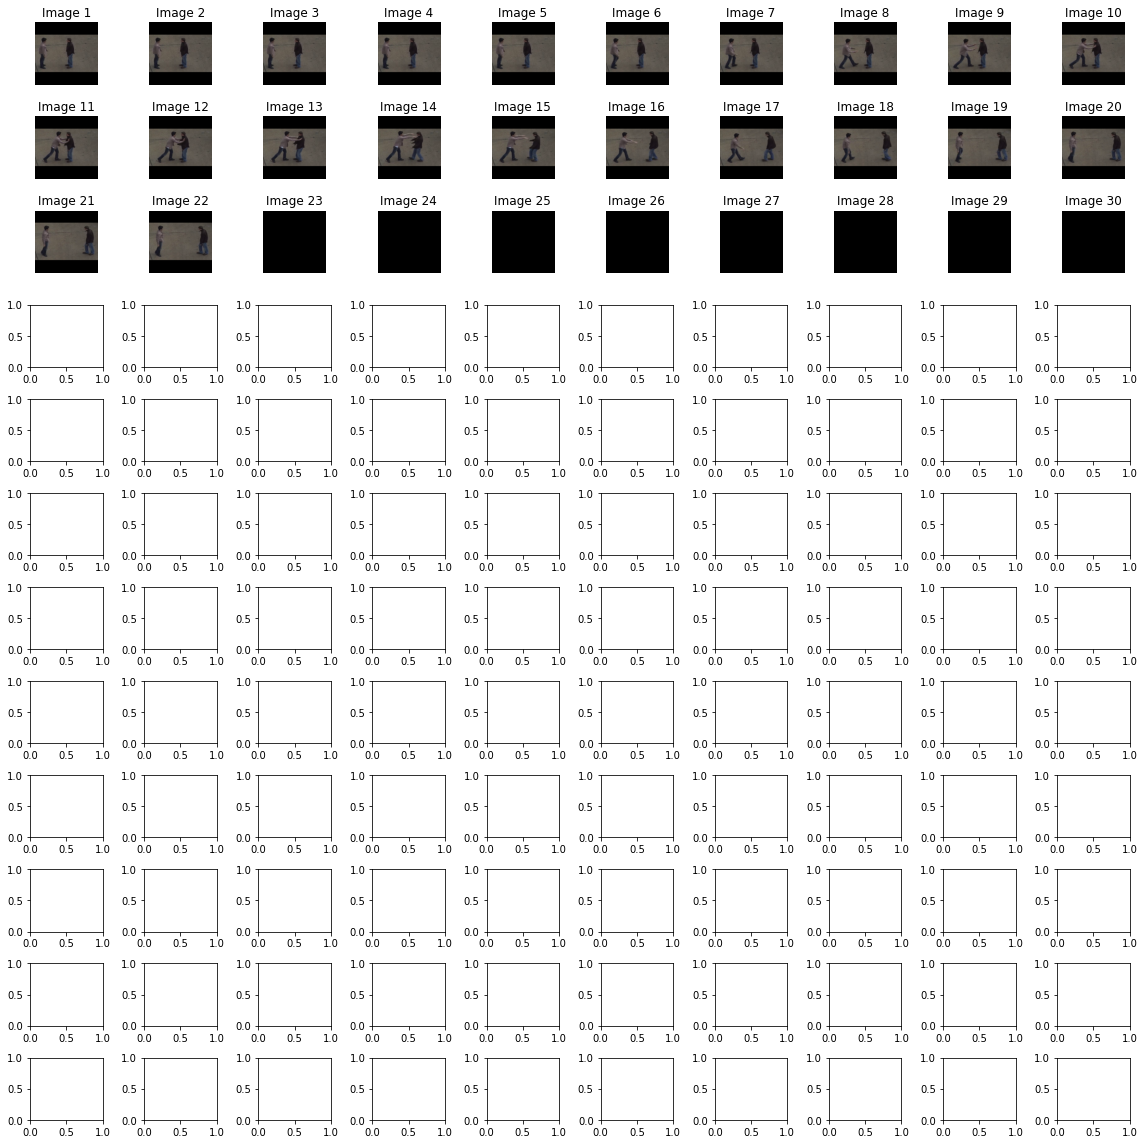

In [44]:
# video_path = './datasets/base_dataset/val/normal_data/ucarg_person07_04_ground_clapping.mp4'
video_path = "./datasets/base_dataset/train/anomaly_data/utint_36_7_push.mp4"

# Define the number of rows and columns for the subplot grid
num_rows = 12  # Adjust the number of rows and columns as needed
num_cols = 10
frames_array = frames_from_video_file(video_path, 30, output_size = (224,224), frame_step = 5)
display_extracted_frames(num_rows, num_cols, frames_array)

In [34]:
type(frames_array)

numpy.ndarray

image1 (224, 224, 3)
image2 (224, 224, 3)


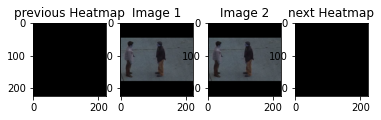

image1 (224, 224, 3)
image2 (224, 224, 3)


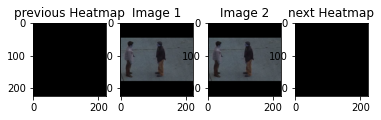

image1 (224, 224, 3)
image2 (224, 224, 3)


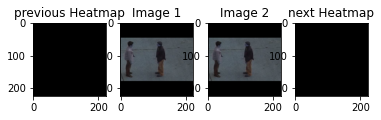

image1 (224, 224, 3)
image2 (224, 224, 3)


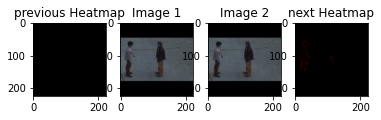

image1 (224, 224, 3)
image2 (224, 224, 3)


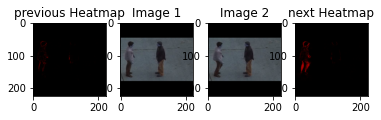

image1 (224, 224, 3)
image2 (224, 224, 3)


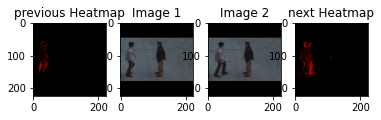

image1 (224, 224, 3)
image2 (224, 224, 3)


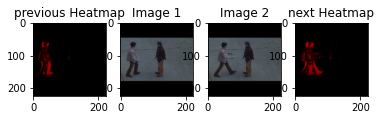

image1 (224, 224, 3)
image2 (224, 224, 3)


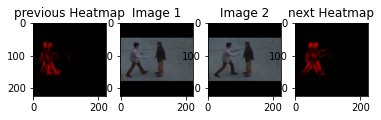

image1 (224, 224, 3)
image2 (224, 224, 3)


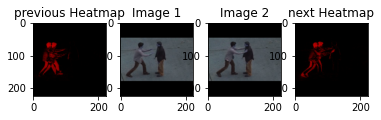

image1 (224, 224, 3)
image2 (224, 224, 3)


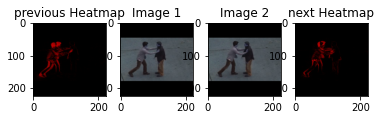

image1 (224, 224, 3)
image2 (224, 224, 3)


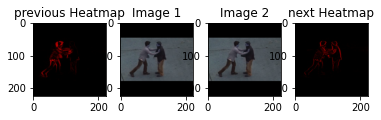

image1 (224, 224, 3)
image2 (224, 224, 3)


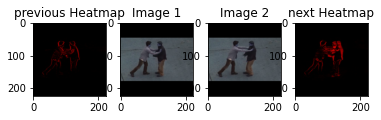

image1 (224, 224, 3)
image2 (224, 224, 3)


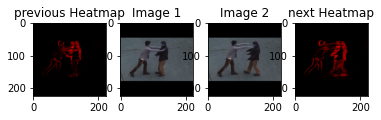

image1 (224, 224, 3)
image2 (224, 224, 3)


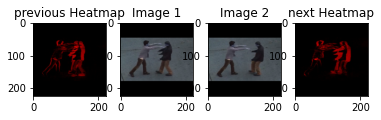

image1 (224, 224, 3)
image2 (224, 224, 3)


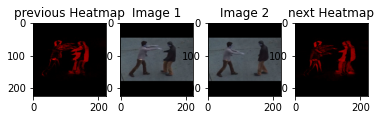

image1 (224, 224, 3)
image2 (224, 224, 3)


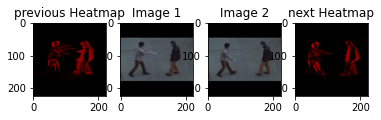

image1 (224, 224, 3)
image2 (224, 224, 3)


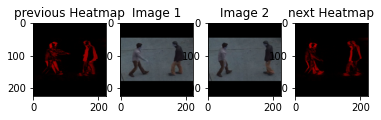

image1 (224, 224, 3)
image2 (224, 224, 3)


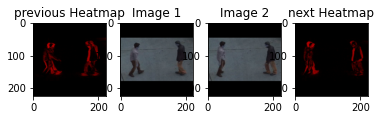

image1 (224, 224, 3)
image2 (224, 224, 3)


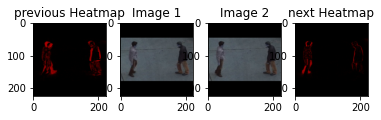

image1 (224, 224, 3)
image2 (224, 224, 3)


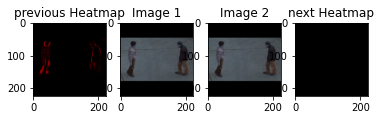

image1 (224, 224, 3)
image2 (224, 224, 3)


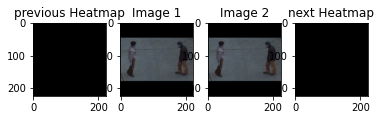

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


previous_heatmap = None
for i in range(22 - 1):
    # Load two images
    image1 = frames_array[i]
    image2 = frames_array[i+1]
    
    print("image1", image1.shape)
    print("image2", image2.shape)
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)*255
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)*255

    # Compute absolute difference between the two images
    diff = cv2.absdiff(gray1, gray2)

    diff = np.array(diff, dtype = np.uint8)
    # print(np.min(diff), np.max(diff))
    # Create a heatmap using a color scale
    heatmap = cv2.applyColorMap(diff, cv2.COLORMAP_HOT)
    
    if previous_heatmap is None:
        previous_heatmap = heatmap

    # Display the original images and the heatmap
    plt.subplot(141), plt.imshow(cv2.cvtColor(previous_heatmap, cv2.COLOR_BGR2RGB)), plt.title('previous Heatmap')
    plt.subplot(142), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1')
    plt.subplot(143), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2')
    plt.subplot(144), plt.imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)), plt.title('next Heatmap')
    
    previous_heatmap = heatmap
    plt.show()


In [57]:
def count_pixels_greater_than_value(image, value):
    return sum(pixel > value for row in image for pixel in row)

def select_frame_on_score(frames_array):
    results = []
    scores = []
    previous_heatmap = None
    for i in range(len(frames_array) - 1):
        # Load two images
        image1 = frames_array[i]
        image2 = frames_array[i+1]
        
        # print("image1", image1.shape)
        # print("image2", image2.shape)
        # Convert images to grayscale
        gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)*255
        gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)*255

        # Compute absolute difference between the two images
        diff = cv2.absdiff(gray1, gray2)

        diff = np.array(diff, dtype = np.uint8)
        
        num = count_pixels_greater_than_value(image = diff, value = 15)
        print("diff", diff.shape, num, diff.shape[0]*diff.shape[1], num/(diff.shape[0]*diff.shape[1]))
        # print(np.min(diff), np.max(diff))
        # Create a heatmap using a color scale
        heatmap = cv2.applyColorMap(diff, cv2.COLORMAP_HOT)
        
        if previous_heatmap is None:
            previous_heatmap = heatmap
            
        results.append((previous_heatmap, image1, image2, heatmap))
        scores.append(num)
                
        previous_heatmap = heatmap
        # plt.show()
    threshold_score = nth_max_score(scores, 30)
    final_selected_frames = []
    for idx, score in enumerate(scores):
        if score >= threshold_score:
            print(idx)
            final_selected_frames.append(results[idx])
    return final_selected_frames

0.49272594

In [60]:
import cv2 as cv 
import numpy as np 


# The video feed is read in as 
# a VideoCapture object 
cap = cv.VideoCapture("/home/armnn/Music/ESML/project/kkk/n/Abuse003_x264.mp4") 

# ret = a boolean return value from 
# getting the frame, first_frame = the 
# first frame in the entire video sequence 
ret, first_frame = cap.read() 

# Converts frame to grayscale because we 
# only need the luminance channel for 
# detecting edges - less computationally 
# expensive 
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY) 

# Creates an image filled with zero 
# intensities with the same dimensions 
# as the frame 
mask = np.zeros_like(first_frame) 

# Sets image saturation to maximum 
mask[..., 1] = 255
video_length = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

print("video_length", video_length)
for frame_idx in range(0, video_length, 5):
	# ret = a boolean return value from getting 
	# the frame, frame = the current frame being 
	# projected in the video
    for _ in range(5):
        ret, frame = cap.read()
	# Opens a new window and displays the input frame
    # cv.imshow("input", frame)
	# Converts each frame to grayscale - we previously 
	# only converted the first frame to grayscale 
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
	
	# Calculates dense optical flow by Farneback method 
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 
									0.5, 3, 15, 3, 5, 1.2, 0) 
	
	# Computes the magnitude and angle of the 2D vectors 
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1]) 
	
	# Sets image hue according to the optical flow 
	# direction 
    mask[..., 0] = angle * 180 / np.pi / 2
	
	# Sets image value according to the optical flow 
	# magnitude (normalized) 
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
	# Converts HSV to RGB (BGR) color representation
    # print("mask", mask)
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR) 
    print("rgb", rgb.shape)
	# Opens a new window and displays the output frame 
    # cv.imshow("dense optical flow", rgb)
    plt.subplot(121)
    plt.imshow(frame)
    plt.title('image')
    plt.subplot(122)
    plt.imshow(rgb)
    plt.title('optical flow')
    plt.show()
	# Updates previous frame 
    prev_gray = gray

79

In [61]:
diff.shape

(224, 224)